<a href="https://colab.research.google.com/github/JaishreeSha/kube-edge-argocd-demo/blob/main/IHAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LABELS:**


1: Jogging.

2: Standing.

3: Walking DownStairs.

4: Walking UpStairs.

5: Sitting.

6: Lying.

#DEEP LEARNING

In [ ]:
pip install livelossplot==0.1.2

In [ ]:
from keras import models
from tensorflow.keras import utils
from keras.layers import Dense, Dropout
#from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

NUM_ROWS = 13
NUM_COLS = 13
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(har, har, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
data_summary(X_val, X_test, Y_val, Y_test)

Train images shape: (1103, 14)
Train labels shape: (1103, 14)
Test images shape: (1103, 14)
Test labels shape: (1103, 14)
Train labels:       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  subject  Activity
1644           0.276724          -0.015138  ...        8         5
4318           0.162574          -0.036860  ...       21         1
2021           0.157170          -0.026741  ...       11         3
5909           0.279105          -0.017281  ...       27         4
3029           0.292394          -0.017302  ...       16         2
...                 ...                ...  ...      ...       ...
668            0.243398          -0.052324  ...        3         2
1218           0.202028          -0.018187  ...        6         6
6224           0.270029          -0.020693  ...       27         2
3826           0.250646           0.009442  ...       19         4
3535           0.317653          -0.015246  ...       17         1

[1103 rows x 14 columns]
Test labels:       tBodyAcc-mean()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(14,)),
    Dense(32, activation='relu'),
    Dense(14, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=400, epochs=50,
          #callbacks=callbacks_list,
          validation_data=(X_val, Y_val))

Epoch 1/50
13/13 [==============================] - 15s 51ms/step - loss: 27.1728 - accuracy: 0.3463 - val_loss: 26.6053 - val_accuracy: 0.9202
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 27.1202 - accuracy: 0.9228 - val_loss: 26.4104 - val_accuracy: 0.9266
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 26.7762 - accuracy: 0.9309 - val_loss: 26.2542 - val_accuracy: 0.9284
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 26.5204 - accuracy: 0.9347 - val_loss: 25.9779 - val_accuracy: 0.9284
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 26.3401 - accuracy: 0.9356 - val_loss: 25.8758 - val_accuracy: 0.9284
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 26.3793 - accuracy: 0.9374 - val_loss: 25.8103 - val_accuracy: 0.9284
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 26.3603 - accuracy: 0.9344 - val_loss: 25.7484 - val_accuracy: 0.9284
Epoc

In [ ]:
model.evaluate(X_test, Y_test)[1]

35/35 [==============================] - 0s 1ms/step - loss: 25.9200 - accuracy: 0.9374


0.9374433159828186

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 14)                462       
Total params: 1,998
Trainable params: 1,998
Non-trainable params: 0
_________________________________________________________________


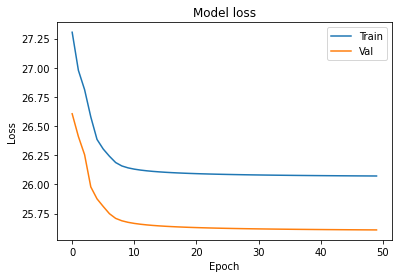

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

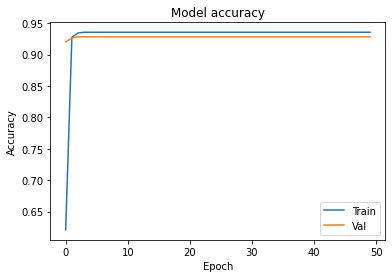

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#SHAP

In [ ]:
pip install shap

In [ ]:
import shap

deep_explainer = shap.DeepExplainer(model, X_train[:10])

shap_values = deep_explainer.shap_values(X_train.values)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.


AttributeError: ignored

In [1]:
shap.initjs()
shap.force_plot(deep_explainer.expected_value[0], shap_values[0][0,:], X_train.iloc[0,:])

NameError: ignored

In [ ]:
shap.summary_plot(shap_values[0],X_train)

In [ ]:
shap.summary_plot(shap_values,X_train)

In [ ]:
shap.dependence_plot("tBodyAcc-mean()-X",shap_values[0], X_train)

#LIME

In [ ]:
pip install lime 


     |████████████████████████████████| 275 kB 5.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=08e4dd8b3dd3b22faa81bcdc960f0eecbd15a05d13c4378456d75bdbcb0bdf2b
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
class_names = ['Jogging','Standing','Walking DownStairs','Walking UpStairs','Sitting','Lying']
#instantiate the explanations for the data set
limeexplainer = LimeTabularExplainer(X_test.values, class_names=class_names, feature_names = X_test.columns, discretize_continuous = True)
idx=0 # the rows of the dataset
explainable_exp = limeexplainer.explain_instance(X_test.values[idx], model.predict, num_features=14, labels=class_names)
explainable_exp.show_in_notebook(show_table=True, show_all=False)


                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    


IndexError: ignored